In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import sklearn
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

%matplotlib inline
sns.set_style('darkgrid') #my default is "whitegrid"

In [2]:

location = "datasets/diamonds.csv"
df = pd.read_csv(location)

In [3]:
df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [4]:
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [5]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [7]:
dupe = df.duplicated()
df.loc[dupe]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z


In [8]:
df.count()

Unnamed: 0    53940
carat         53940
cut           53940
color         53940
clarity       53940
depth         53940
table         53940
price         53940
x             53940
y             53940
z             53940
dtype: int64

In [9]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [73]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'], dtype=object)

In [11]:
df['carat'].value_counts()

0.30    2604
0.31    2249
1.01    2242
0.70    1981
0.32    1840
1.00    1558
0.90    1485
0.41    1382
0.40    1299
0.71    1294
0.50    1258
0.33    1189
0.51    1127
0.34     910
1.02     883
0.52     817
1.51     807
1.50     793
0.72     764
0.53     709
0.42     706
0.38     670
0.35     667
1.20     645
0.54     625
0.36     572
0.91     570
1.03     523
0.55     496
0.73     492
        ... 
2.58       3
2.55       3
2.63       3
1.92       2
3.04       2
2.75       2
2.80       2
4.01       2
2.68       2
3.24       1
2.67       1
3.65       1
4.00       1
3.11       1
2.64       1
4.50       1
3.50       1
2.59       1
3.02       1
3.51       1
2.65       1
3.05       1
2.71       1
3.22       1
4.13       1
2.70       1
3.67       1
5.01       1
2.77       1
3.40       1
Name: carat, Length: 273, dtype: int64

In [12]:
#DIamond with the highest 
df.loc[df['carat'] == 3.40]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
26431,26432,3.4,Fair,D,I1,66.8,52.0,15964,9.42,9.34,6.27


In [13]:
#Most Expensive Diamond
df.loc[df['price'] == df['price'].max()]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
27749,27750,2.29,Premium,I,VS2,60.8,60.0,18823,8.5,8.47,5.16


In [14]:
def getDiamondSize(x, y, z):
    if z == 0: 
        return x * y * 1
    return x*y*z

df['size'] = getDiamondSize(df['x'], df['y'], df['z'])
df.head()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
df.loc[df['size'] == df['size'].max()]

In [ ]:
df.loc[df['size'] == df['size'].min()]

In [ ]:
df['clarity'].value_counts()

In [ ]:
df['color'].value_counts()

In [ ]:
#sns.lmplot?
sns.lmplot(x='carat', y='price', data=df, fit_reg=False, hue='cut', truncate=True)

In [ ]:
sns.boxplot(data=df)


In [ ]:
sf = df.drop('Unnamed: 0', axis=1)
corr = sf.corr()
sns.heatmap(corr, vmin=-1, annot=True)

In [ ]:
sns.distplot(df['price'])

In [ ]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
sns.countplot(x='color', data=sf, palette=pkmn_type_colors)
plt.xticks(rotation=-45)

In [ ]:
result = smf.ols('price ~ carat + clarity -1 ', data=df).fit()
result.summary()

In [ ]:
sf.corr()

In [ ]:
g = sns.factorplot(x='carat', y='depth',
                   data=df,
                   hue='color', 
                   col='color',
                   kind='swarm')

#rotate x-axis labels on ALL charts
g.set_xticklabels(rotation=-45)

In [16]:
df.data.shape

AttributeError: 'DataFrame' object has no attribute 'data'

In [20]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
X = df.drop(['price', 'clarity', 'color', 'cut', 'Unnamed: 0', 'x','y','z'], axis = 1)
lm.fit(X, df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
print('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: 13003.4405242


In [43]:
print('Number of coefficients:', len(lm.coef_))

Number of coefficients: 3


In [44]:
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,carat,7858.770510
1,depth,-151.236347
2,table,-104.472780


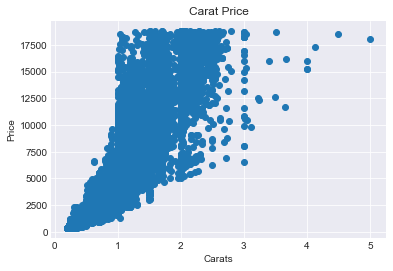

In [45]:
plt.scatter(df.carat, df.price) 
plt.xlabel("Carats") 
plt.ylabel("Price") 
plt.title("Carat Price") 
plt.show()

In [47]:
lm.predict(X)[0:5]
lm.predict?

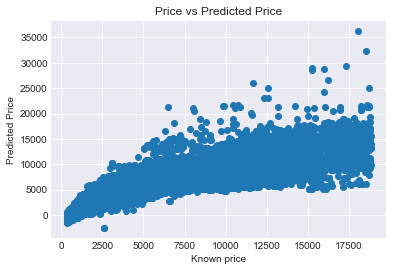

In [50]:
plt.scatter(df.price, lm.predict(X))
plt.xlabel("Known price")
plt.ylabel("Predicted Price")
plt.title("Price vs Predicted Price")
plt.show()

In [52]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, df.price, test_size=0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(36139, 3)
(17801, 3)
(36139,)
(17801,)


In [53]:
lm=LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [54]:
print ('Fit a model X_train, and calculate MSE with Y_train:', np.mean((Y_train - lm.predict(X_train)) ** 2))
print ('Fit a model X_train, and calculate MSE with X_test, Y_test:', np.mean((Y_test - lm.predict(X_test)) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 2338742.6664226027
Fit a model X_train, and calculate MSE with X_test, Y_test: 2308736.577142217


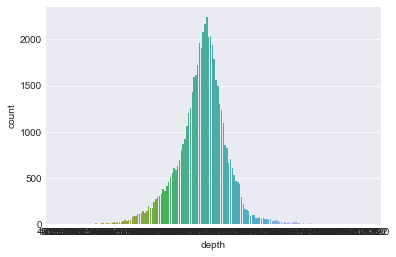

In [56]:
sns.countplot(x='depth', data=df)

[Text(0.5,0,'Price')]

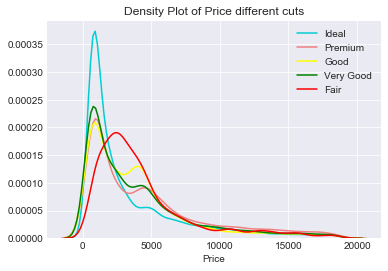

In [69]:
#plot age by survival status
#plt.figure(figsize=(10,6))

ax = sns.kdeplot(df['price'][df['cut'] == 'Ideal'], #passengers that survived
                 color="darkturquoise",
                 shade=False)

sns.kdeplot(df['price'][df['cut']  == 'Premium'], #passengers that did not survive
            color="lightcoral",
            shade=False)

sns.kdeplot(df['price'][df['cut']  == 'Good'], #passengers that did not survive
            color="yellow",
            shade=False)
sns.kdeplot(df['price'][df['cut']  == 'Very Good'], #passengers that did not survive
            color="green",
            shade=False)
sns.kdeplot(df['price'][df['cut']  == 'Fair'], #passengers that did not survive
            color="red",
            shade=False)

plt.legend (['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'])
plt.title("Density Plot of Price different cuts")

#Ideal', 'Premium', 'Good', 'Very Good', 'Fair
ax.set(xlabel='Price')
#plt.show()

[Text(0.5,0,'Price')]

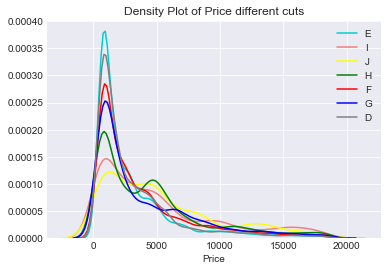

In [72]:
#plot age by survival status
#plt.figure(figsize=(10,6))

ax = sns.kdeplot(df['price'][df['color'] == 'E'], #passengers that survived
                 color="darkturquoise",
                 shade=False)

sns.kdeplot(df['price'][df['color']  == 'I'], #passengers that did not survive
            color="lightcoral",
            shade=False)

sns.kdeplot(df['price'][df['color']  == 'J'], #passengers that did not survive
            color="yellow",
            shade=False)
sns.kdeplot(df['price'][df['color']  == 'H'], #passengers that did not survive
            color="green",
            shade=False)
sns.kdeplot(df['price'][df['color']  == 'F'], #passengers that did not survive
            color="red",
            shade=False)
sns.kdeplot(df['price'][df['color']  == 'G'], #passengers that did not survive
            color="blue",
            shade=False)
sns.kdeplot(df['price'][df['color']  == 'D'], #passengers that did not survive
            color="grey",
            shade=False)

plt.legend (['E', 'I', 'J', 'H', 'F', 'G', 'D'])
plt.title("Density Plot of Price different cuts")

#['E', 'I', 'J', 'H', 'F', 'G', 'D
ax.set(xlabel='Price')
#plt.show()
#

[Text(0.5,0,'Price')]

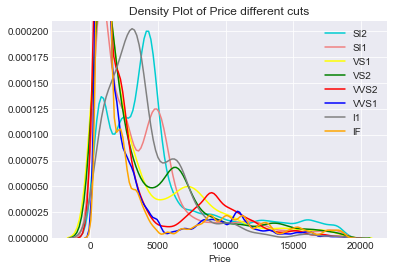

In [74]:
#plot age by survival status
#plt.figure(figsize=(10,6))

ax = sns.kdeplot(df['price'][df['clarity'] == 'SI2'], #passengers that survived
                 color="darkturquoise",
                 shade=False)

sns.kdeplot(df['price'][df['clarity']  == 'SI1'], #passengers that did not survive
            color="lightcoral",
            shade=False)

sns.kdeplot(df['price'][df['clarity']  == 'VS1'], #passengers that did not survive
            color="yellow",
            shade=False)
sns.kdeplot(df['price'][df['clarity']  == 'VS2'], #passengers that did not survive
            color="green",
            shade=False)
sns.kdeplot(df['price'][df['clarity']  == 'VVS2'], #passengers that did not survive
            color="red",
            shade=False)
sns.kdeplot(df['price'][df['clarity']  == 'VVS1'], #passengers that did not survive
            color="blue",
            shade=False)
sns.kdeplot(df['price'][df['clarity']  == 'I1'], #passengers that did not survive
            color="grey",
            shade=False)
sns.kdeplot(df['price'][df['clarity']  == 'IF'], #passengers that did not survive
            color="orange",
            shade=False)

plt.legend (['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'])
plt.title("Density Plot of Price different cuts")

#['E', 'I', 'J', 'H', 'F', 'G', 'D
ax.set(xlabel='Price')
#plt.show()
#